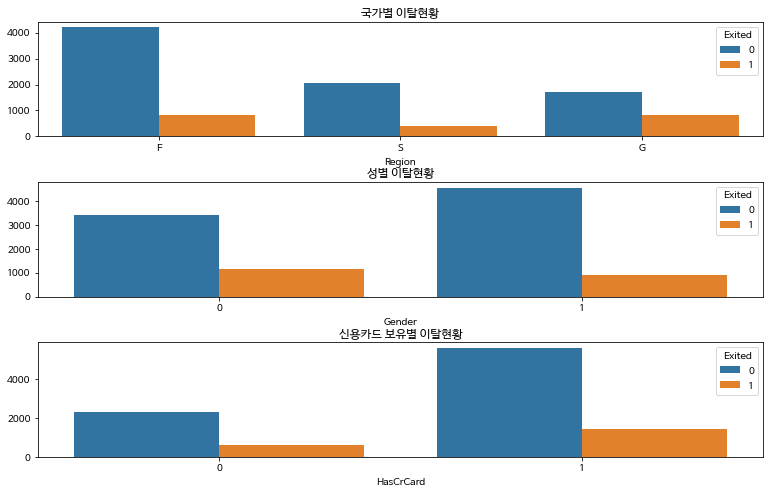

In [2]:
#1-1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

bank = pd.read_excel('bank_new.xlsx')

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(13,8))

sns.countplot(x='Region', hue='Exited', data=bank, ax=ax1)
ax1.set_title('국가별 이탈현황')
ax1.set_ylabel('')

sns.countplot(x='Gender', hue='Exited', data=bank, ax=ax2)
ax2.set_title('성별 이탈현황')
ax2.set_ylabel('')

sns.countplot(x='HasCrCard', hue='Exited', data=bank, ax=ax3)
ax3.set_title('신용카드 보유별 이탈현황')
ax3.set_ylabel('')

plt.rc('font', family='NanumBarunGothic')
plt.subplots_adjust(wspace=0, hspace=0.4)


In [3]:
bank.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,Region
9995,771,1,39,5,0.00,2,1,96270.64,0,F
9996,516,1,35,10,57369.61,1,1,101699.77,0,F
9997,709,0,36,7,0.00,1,0,42085.58,1,F
9998,772,1,42,3,75075.31,2,1,92888.52,1,G
9999,792,0,28,4,130142.79,1,1,38190.78,0,F


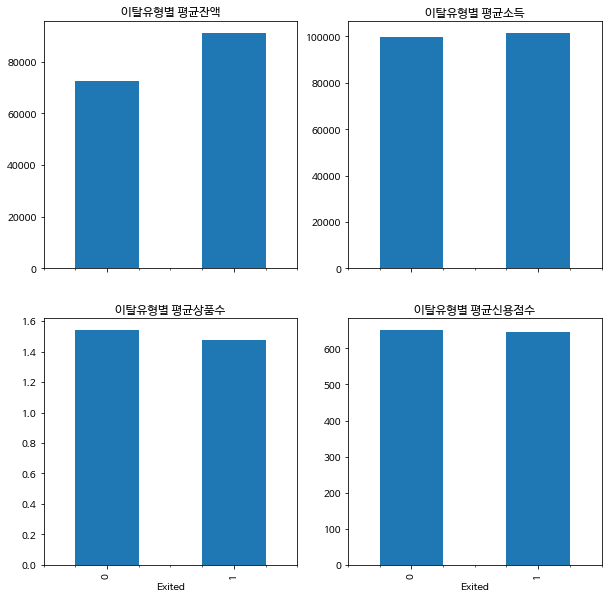

In [4]:
#1-2
bank=pd.read_excel('bank_new.xlsx')
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True, figsize=(10,10))

bank.pivot_table(index='Exited', values='Balance', aggfunc='mean').plot.bar(legend=False, ax=ax1)
ax1.set_title('이탈유형별 평균잔액')
bank.pivot_table(index='Exited', values='EstimatedSalary', aggfunc='mean').plot.bar(legend=False, ax=ax2)
ax2.set_title('이탈유형별 평균소득')
bank.pivot_table(index='Exited', values='NumOfProducts', aggfunc='mean').plot.bar(legend=False, ax=ax3)
ax3.set_title('이탈유형별 평균상품수')
bank.pivot_table(index='Exited', values='CreditScore', aggfunc='mean').plot.bar(legend=False,ax=ax4)
ax4.set_title('이탈유형별 평균신용점수')
plt.rc('font', family='NanumGothic')

C:\Users\kmb03\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kmb03\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kmb03\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

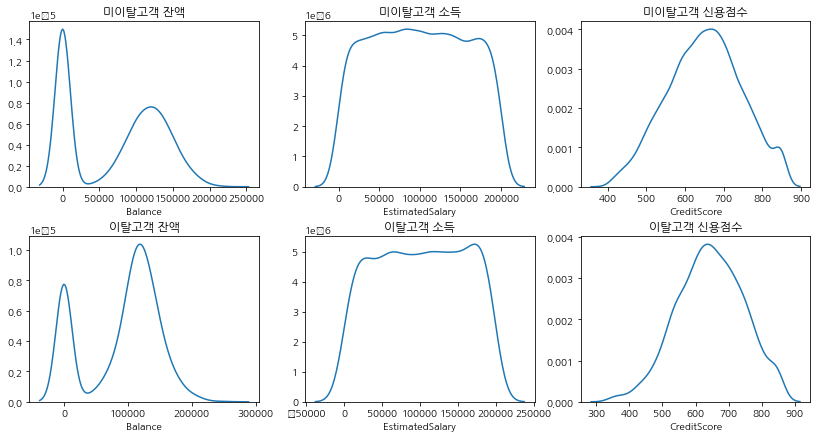

In [5]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(14,7))
#미이탈: exited=0
bank_0=bank.query('Exited==0')

sns.distplot(bank_0['Balance'],hist=False, ax=ax1)
ax1.set_title('미이탈고객 잔액')
ax1.set_ylabel('')
sns.distplot(bank_0['EstimatedSalary'],hist=False, ax=ax2)
ax2.set_title('미이탈고객 소득')
ax2.set_ylabel('')
sns.distplot(bank_0['CreditScore'],hist=False, ax=ax3)
ax3.set_title('미이탈고객 신용점수')
ax3.set_ylabel('')

#이탈: exited=1
bank_1=bank.query('Exited==1')

sns.distplot(bank_1['Balance'],hist=False, ax=ax4)
ax4.set_title('이탈고객 잔액')
ax4.set_ylabel('')
sns.distplot(bank_1['EstimatedSalary'],hist=False, ax=ax5)
ax5.set_title('이탈고객 소득')
ax5.set_ylabel('')
sns.distplot(bank_1['CreditScore'],hist=False, ax=ax6)
ax6.set_title('이탈고객 신용점수')
ax6.set_ylabel('')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.rc('font', family='NanumGothic')

In [4]:
#1-4
import statsmodels.formula.api as smf
formula="Exited~CreditScore+C(Gender)+Age+Tenure+Balance+NumOfProducts+C(HasCrCard)+EstimatedSalary+C(Region)"
model=smf.logit(formula, data=bank)
result=model.fit()
print(result.summary())
#많은 사람들이 신용카드를 가지고 있기 대문에 신용카드를 보유한 고객의 이탈'수'가 많은 것이지, 이탈률(이탈가능성)이 높은 것이 아님

Optimization terminated successfully.
         Current function value: 0.446713
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                  0.1163
Time:                        22:53:52   Log-Likelihood:                -4467.1
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                2.745e-246
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.4210      0.239    -14.319      0.000      -3.889      -2.953
C(Gender

성별이 이탈률에 미치는 영향은 유의미하며, 남성의 이탈률이 여성의 이탈률보다 낮다고 할 수 있다.
독일의 이탈률이 타 국가보다 이탈률이 높다고 할 수 있다.

신용 점수, 보유중인상품수는 높아질수록 이탈률이 낮아지며,
나이, 계좌잔고는 높아질수록 이탈률이 높아질 수 있겠다.

그 외 변수(Tenure,소득)은 이탈률에 사실상 영향을 미치지 않는다.

In [11]:
#2-0 데이터는 일주일 판매량인데 문제에서 요구하는 것은 월 판매량이므로 데이터 전처리 필요
import statsmodels.api as sm
sale=pd.read_excel('sale.xlsx')
sale.drop(0,inplace=True)
sale.set_index('date',inplace=True)
sale=sale.resample('M').sum()
sale

,sale
date,
2016-12-31,8
2017-01-31,21
2017-02-28,7
2017-03-31,19
2017-04-30,14
2017-05-31,38
2017-06-30,14
2017-07-31,21
2017-08-31,14


C:\Users\kmb03\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmb03\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


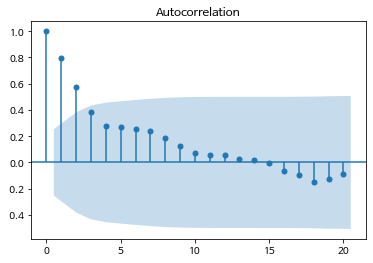

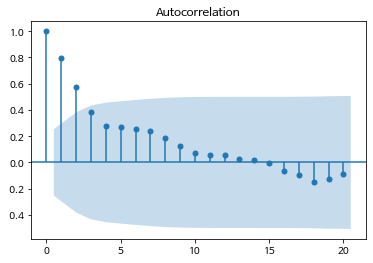

In [12]:
#2-1 월판매량의 자기상관계수
sm.graphics.tsa.plot_acf(sale, lags=20)

C:\Users\kmb03\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmb03\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


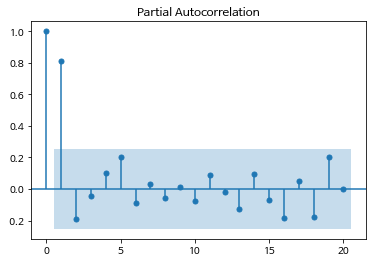

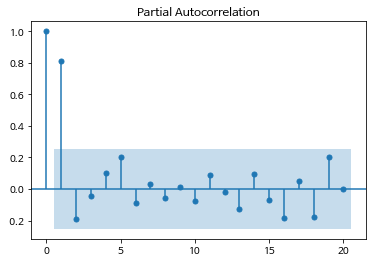

In [13]:
#2-2 월판매량의 편자기상관계수
sm.graphics.tsa.plot_pacf(sale, lags=20)

In [8]:
#2-3
import statsmodels.tsa.api as tsa
model=tsa.ARMA(sale,(1,0))
result=model.fit()
result.summary() #시계열모형 추정 

C:\Users\kmb03\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   sale   No. Observations:                   60
Model:                     ARMA(1, 0)   Log Likelihood                -309.094
Method:                       css-mle   S.D. of innovations             41.434
Date:                Thu, 23 Dec 2021   AIC                            624.187
Time:                        22:53:57   BIC                            630.470
Sample:                    12-31-2016   HQIC                           626.645
                         - 11-30-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5320     25.234      2.121      0.034       4.075     102.989
ar.L1.sale     0.8000      0.074     10.764      0.000       0.654       0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2501           +0.0000j            1.2501            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
#2-4 추정한 모형을 이용하여 판매량 예측
a=result.forecast(6)[0]
a=a.astype(int) #정수변환
print("12월 예정 판매량: ", a[0])
for i in range(1,6):
    print(i,"월 예정 판매량: ", a[i])

12월 예정 판매량:  19
1 월 예정 판매량:  26
2 월 예정 판매량:  31
3 월 예정 판매량:  36
4 월 예정 판매량:  39
5 월 예정 판매량:  42


In [10]:
#3
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

supermarket=pd.read_excel('supermarket.xlsx')
supermarket.set_index('Transaction',inplace=True)
supermarket_1=supermarket.applymap(lambda x:1 if x>=1 else 0)
frequent_itemsets=apriori(supermarket_1, min_support=0.1, use_colnames=True)
print(frequent_itemsets.tail())
rules=association_rules(frequent_itemsets, metric='lift', min_threshold=1.4)
rules

      support                        itemsets
164  0.101101  (Nutmeg, Ice cream, chocolate)
165  0.101101   (Ice cream, Onion, chocolate)
166  0.100100    (Milk, Nutmeg, Kidney Beans)
167  0.101101  (Yogurt, Nutmeg, Kidney Beans)
168  0.104104       (Yogurt, Milk, chocolate)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968
1,(Onion),"(Cheese, Dill)",0.403403,0.177177,0.102102,0.253102,1.428523,0.030628,1.101653
2,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446
3,"(chocolate, Dill)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051
4,(Milk),"(chocolate, Dill)",0.405405,0.199199,0.114114,0.281481,1.413065,0.033358,1.114517
5,(chocolate),"(Milk, Dill)",0.421421,0.190190,0.114114,0.270784,1.423753,0.033964,1.110521
6,"(Unicorn, Dill)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764
7,(chocolate),"(Unicorn, Dill)",0.421421,0.168168,0.101101,0.239905,1.426578,0.030231,1.094379


In [14]:
#4
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

big=pd.read_excel('big.xlsx')
#Member: 고객ID, Order: 거래번호, SKU 제품번호, Description: 제품설명
big['수량']=1
basket=big.pivot_table(index='Order', columns='Description', values='수량', aggfunc='sum')
basket.fillna(0,inplace=True)
basket.head(20)
basket_1=basket.applymap(lambda x:1 if x>=1 else 0)

frequent_itemsets=apriori(basket_1, min_support=0.1, use_colnames=True)
print(frequent_itemsets.tail())
rules=association_rules(frequent_itemsets, metric='lift', min_threshold=1.7)
rules

     support                                           itemsets
37  0.113032         (Beans, Root Vegetables, Gourd & Cucumber)
38  0.153571         (Beans, Other Vegetables, Root Vegetables)
39  0.100274     (Brinjals, Other Vegetables, Gourd & Cucumber)
40  0.109336      (Brinjals, Other Vegetables, Root Vegetables)
41  0.120186  (Other Vegetables, Root Vegetables, Gourd & Cu...


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Brinjals),(Gourd & Cucumber),0.272445,0.300346,0.141409,0.519037,1.728132,0.059581,1.454695
1,(Gourd & Cucumber),(Brinjals),0.300346,0.272445,0.141409,0.470822,1.728132,0.059581,1.374876
2,"(Beans, Other Vegetables)",(Gourd & Cucumber),0.244664,0.300346,0.131632,0.538012,1.791308,0.058148,1.514441
3,(Gourd & Cucumber),"(Beans, Other Vegetables)",0.300346,0.244664,0.131632,0.438269,1.791308,0.058148,1.344658
4,"(Brinjals, Other Vegetables)",(Gourd & Cucumber),0.172529,0.300346,0.100274,0.581202,1.935111,0.048456,1.670627
5,"(Other Vegetables, Gourd & Cucumber)",(Brinjals),0.195183,0.272445,0.100274,0.513745,1.885679,0.047098,1.496240
6,(Brinjals),"(Other Vegetables, Gourd & Cucumber)",0.272445,0.195183,0.100274,0.368053,1.885679,0.047098,1.273550
7,(Gourd & Cucumber),"(Brinjals, Other Vegetables)",0.300346,0.172529,0.100274,0.333863,1.935111,0.048456,1.242193


In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#데이터 불러들여서 전처리
credit=pd.read_excel('credit.xlsx')
credit.dropna(inplace=True)
customers=credit['CUST_ID']
credit.drop('CUST_ID',axis=1,inplace=True)

scaler=StandardScaler()
credit_scaled=scaler.fit_transform(credit)
model=KMeans(n_clusters=3, random_state=0)
result=model.fit(credit_scaled)
cluster=pd.DataFrame({'cluster': result.labels_})
credit['CUST_ID']=customers
credit['cluster']=cluster
cluster.tail(20)

,cluster
8929,0
8930,0
8931,0
8932,0
8933,0
8934,0
8935,0
8936,0
8937,0
8938,0


[[-0.4249337  -0.34911414 -0.4668054  ... -0.51138082 -0.96037969
  -0.52902627]
 [-0.4695839  -0.45460688  2.6054375  ... -0.59184052  0.68860056
   0.81854607]
 [-0.10771601 -0.45460688 -0.4668054  ... -0.10908229  0.82601558
  -0.38385745]
 ...
 [-0.40200016 -0.29493024 -0.4668054  ... -0.39069126 -0.96037969
  -0.57066048]
 [-0.4695839  -0.45460688 -0.44937277 ... -0.59184052 -1.09779471
  -0.58058129]
 [ 0.0420915  -0.45460688 -0.40622786 ...  0.3334461  -0.90541368
  -0.57691448]]


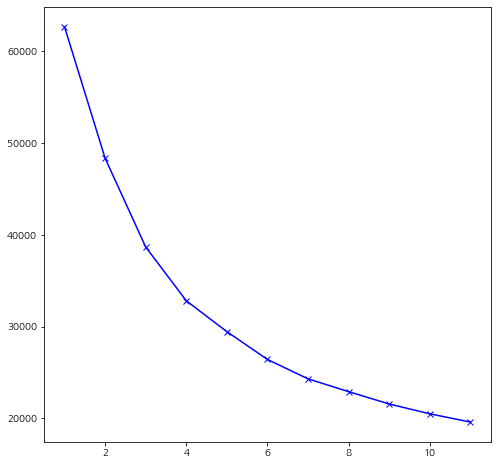

In [16]:
#5 Elbow Method
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

credit=pd.read_excel('credit.xlsx')
credit.dropna(inplace=True)
credit.drop('CUST_ID',axis=1,inplace=True)

scaler=StandardScaler()
credit_scaled=scaler.fit_transform(credit)
print(credit_scaled)#전처리 된 데이터 출력

#빈 배열 만들어서 elbow method 구하기
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(credit_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')

C:\Users\kmb03\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmb03\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


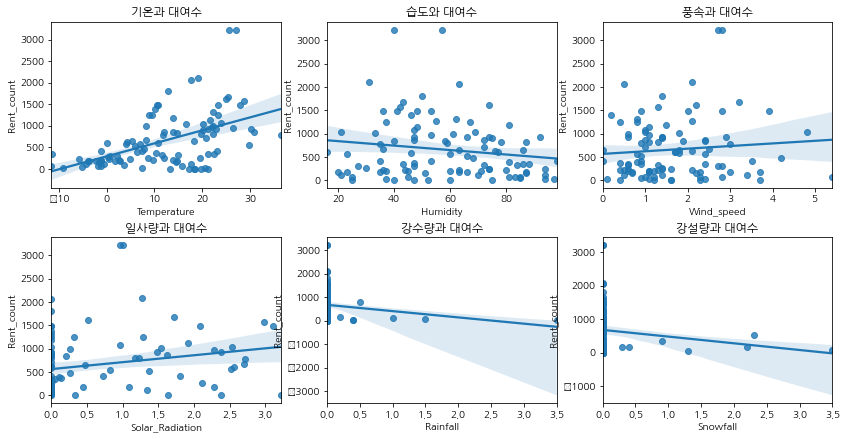

In [17]:
#6-1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
from matplotlib import font_manager
import statsmodels.formula.api as smf

seoulbike=pd.read_excel('SeoulBikeData.xlsx')
seoulbike_s=seoulbike.sample(n=100)

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(14,7))

#기온과 대여수
sns.regplot(x='Temperature', y='Rent_count', data=seoulbike_s, ax=ax1)
ax1.set_title('기온과 대여수')

sns.regplot(x='Humidity', y='Rent_count', data=seoulbike_s, ax=ax2)
ax2.set_title('습도와 대여수')

sns.regplot(x='Wind_speed', y='Rent_count', data=seoulbike_s, ax=ax3)
ax3.set_title('풍속과 대여수')

sns.regplot(x='Solar_Radiation', y='Rent_count', data=seoulbike_s, ax=ax4)
ax4.set_title('일사량과 대여수')

sns.regplot(x='Rainfall', y='Rent_count', data=seoulbike_s, ax=ax5)
ax5.set_title('강수량과 대여수')

sns.regplot(x='Snowfall', y='Rent_count', data=seoulbike_s, ax=ax6)
ax6.set_title('강설량과 대여수')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.rc('font', family='NanumBarunGothic')

In [18]:
#6-2
import statsmodels.formula.api as smf
formula="Rent_count~Temperature+Humidity+Wind_speed+Solar_Radiation\
+Rainfall+Snowfall"
Bikemodel=smf.ols(formula, data=seoulbike_s)
result=Bikemodel.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Rent_count   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8.397
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           2.78e-07
Time:                        22:44:09   Log-Likelihood:                -765.34
No. Observations:                 100   AIC:                             1545.
Df Residuals:                      93   BIC:                             1563.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         747.1643    248.121      3.011      0.003     254.445    1239.884
Temperature        39.2031      6.422      6.105      0.000      26.451      51.956
Humidity           -9.0977      3.608     -2.521      0.013     -16.263      -1.933
Wind_speed         45.9215     55.577      0.826      0.411     -64.444     156.287
Solar_Radiation  -161.2714     84.752     -1.903      0.060    -329.573       7.030
Rainfall         -247.4570    141.604     -1.748      0.084    -528.655      33.741
Snowfall           55.3342    116.186      0.476      0.635    -175.389     286.057
==============================================================================
Omnibus:                       24.597   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.822
Skew:                           0.965   Prob(JB):                     4.13e-11
Kurtosis:                       5.784   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Date,Hour,Rent_count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall
0,01/12/2017,0,254,-5.2,37,2.2,2000,0.0,0.0,0.0
1,01/12/2017,1,204,-5.5,38,0.8,2000,0.0,0.0,0.0
2,01/12/2017,2,173,-6.0,39,1.0,2000,0.0,0.0,0.0
3,01/12/2017,3,107,-6.2,40,0.9,2000,0.0,0.0,0.0
4,01/12/2017,4,78,-6.0,36,2.3,2000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,1003,4.2,34,2.6,1894,0.0,0.0,0.0
8756,30/11/2018,20,764,3.4,37,2.3,2000,0.0,0.0,0.0
8757,30/11/2018,21,694,2.6,39,0.3,1968,0.0,0.0,0.0
8758,30/11/2018,22,712,2.1,41,1.0,1859,0.0,0.0,0.0


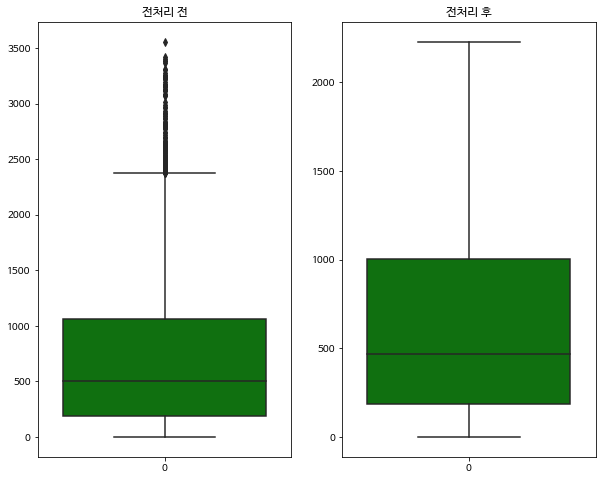

In [19]:
#6-3 데이터 전처리 전, 후 boxplot 출력
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,8))
sns.boxplot(data=seoulbike['Rent_count'],color='green', ax=ax1)
ax1.set_title('전처리 전')
#2500부터 이상치라 할 수 있겠다.
fixed_seoulbike=seoulbike[seoulbike['Rent_count']<=2230]
sns.boxplot(data=fixed_seoulbike['Rent_count'],color='green', ax=ax2)
ax2.set_title('전처리 후')
fixed_seoulbike

In [20]:
#3-3
import statsmodels.formula.api as smf
formula="Rent_count~Temperature+Humidity+Wind_speed+Solar_Radiation\
+Rainfall+Snowfall"
Bikemodel=smf.ols(formula, data=seoulbike_s)
result=Bikemodel.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Rent_count   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8.397
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           2.78e-07
Time:                        22:44:10   Log-Likelihood:                -765.34
No. Observations:                 100   AIC:                             1545.
Df Residuals:                      93   BIC:                             1563.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         747.1643    248.121      3.011      0.003     254.445    1239.884
Temperature        39.2031      6.422      6.105      0.000      26.451      51.956
Humidity           -9.0977      3.608     -2.521      0.013     -16.263      -1.933
Wind_speed         45.9215     55.577      0.826      0.411     -64.444     156.287
Solar_Radiation  -161.2714     84.752     -1.903      0.060    -329.573       7.030
Rainfall         -247.4570    141.604     -1.748      0.084    -528.655      33.741
Snowfall           55.3342    116.186      0.476      0.635    -175.389     286.057
==============================================================================
Omnibus:                       24.597   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.822
Skew:                           0.965   Prob(JB):                     4.13e-11
Kurtosis:                       5.784   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""